In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import yfinance as yf
import datetime as dt


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

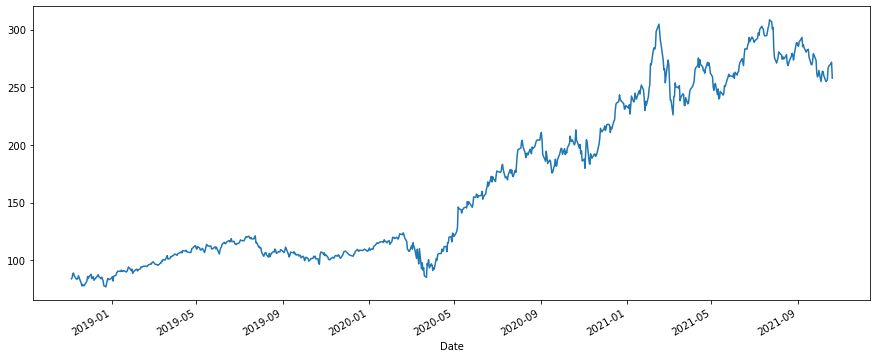

In [8]:
ticker = ["PYPL"]
start = dt.datetime.today()-dt.timedelta(1080)
end = dt.datetime.today()
data = pd.DataFrame()
data= yf.download(ticker,start,end)["Adj Close"]
#Plot
data.plot(figsize=(15,6))


C:\Users\matth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

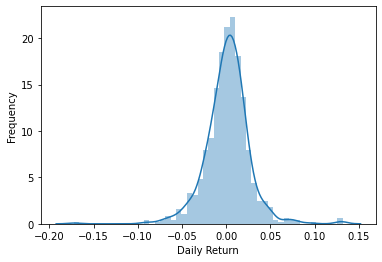

In [10]:
log_returns = np.log(1 + data.pct_change())
#Plot
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [11]:
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)

In [13]:
stdev = log_returns.std()
days = 50
trials = 10000
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift + stdev * Z)

In [14]:
daily_returns

array([[1.00434724, 1.01898405, 1.0026059 , ..., 0.98605033, 0.97507731,
        0.97746335],
       [0.99857271, 1.02331785, 1.00685073, ..., 0.98354186, 0.98785684,
        0.99187802],
       [1.02299505, 0.98594943, 1.02686728, ..., 1.0323486 , 0.98962242,
        0.98866214],
       ...,
       [1.03613764, 1.04530091, 0.98978576, ..., 0.99182884, 1.01440779,
        0.96819751],
       [1.01070395, 0.9927846 , 1.00208754, ..., 1.01658606, 0.99928256,
        1.02581862],
       [0.9593876 , 1.02305283, 0.99712622, ..., 1.01055435, 0.99908019,
        0.97713436]])

In [15]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = data.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

In [18]:
def import_stock_data(tickers, start, end):
    data = pd.DataFrame()
    if len([tickers]) ==1:
        data[tickers] = yf.download(tickers,start,end)["Adj Close"]
        data = pd.DataFrame(data)
    else:
        for t in ticker:
            data[t] = yf.download(tickers,start,end)["Adj Close"]
    return(data)
#Example use
data = import_stock_data(["FB","GOOG","AAPL"], start, end)

[*********************100%***********************]  3 of 3 completed


In [19]:
def log_returns(data):
    return (np.log(1+data.pct_change()))
#Example use
log_return = log_returns(data)

In [20]:
def drift_calc(data):
    lr = log_returns(data)
    u = lr.mean()
    var = lr.var()
    drift = u-(0.5*var)
    try:
        return drift.values
    except:
        return drift
#Example use
drift_calc(data)

array([0.00125347, 0.0008556 , 0.0011741 ])

In [22]:
def daily_returns(data, days, iterations):
    ft = drift_calc(data)
    try:
        stv = log_returns(data).std().values
    except:
        stv = log_returns(data).std()
    dr = np.exp(ft + stv * norm.ppf(np.random.rand(days, iterations)))
    return dr
#Example use
daily_returns(data, 50, 1000)

ValueError: operands could not be broadcast together with shapes (3,) (50,1000) 